# Machine Learning and Deep Mining Spam Email Detection Project

In [790]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re
import enchant
from sklearn.preprocessing import StandardScaler

In [791]:
df = pd.read_csv("spam_nospam.csv", header=None)
df[:]

,0,1,2
0,CATEGORY,MESSAGE,FILE_NAME
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
2,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
3,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


## Dataset information and statistics

In [792]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5797 non-null   object
 1   1       5797 non-null   object
 2   2       5797 non-null   object
dtypes: object(3)
memory usage: 136.0+ KB


In [793]:
df.describe()

,0,1,2
count,5797,5797,5797
unique,3,5626,5797
top,0,\n\nHello I am your hot lil horny toy.\n\n ...,FILE_NAME
freq,3900,7,1


In [794]:
df.shape

(5797, 3)

In [795]:
df.dtypes

0    object
1    object
2    object
dtype: object

In [796]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [797]:
df = df.rename(columns={0:"Type", 1:"Message", 2:"Filename"})
df = df.drop(columns={"Filename"})
df = df.drop(0)
df[:]

,Type,Message
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
2,1,ATTENTION: This is a MUST for ALL Computer Use...
3,1,This is a multi-part message in MIME format.\n...
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
5,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver..."
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [798]:
df["Length"] = df["Message"].apply(len)
df[:]

,Type,Message,Length
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612
2,1,ATTENTION: This is a MUST for ALL Computer Use...,1298
3,1,This is a multi-part message in MIME format.\n...,6691
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141
5,1,This is the bottom line. If you can GIVE AWAY...,1795
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",953
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,257
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",393
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1434


<Axes: xlabel='Type', ylabel='count'>

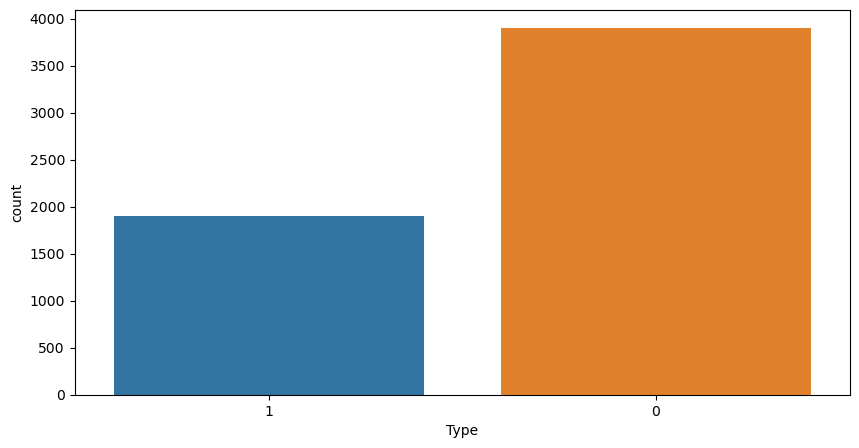

In [799]:
plt.figure(figsize = (10, 5))
x = df.Type.value_counts()
sns.countplot(x = "Type", data = df)

## Cleaning the dataset

In [800]:
df[:]

,Type,Message,Length
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612
2,1,ATTENTION: This is a MUST for ALL Computer Use...,1298
3,1,This is a multi-part message in MIME format.\n...,6691
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141
5,1,This is the bottom line. If you can GIVE AWAY...,1795
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",953
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,257
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",393
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1434


In [801]:
html_content_tags = ["html", "body", "head", "footer", "b", "br", "font", "http", "com", "www"]

In [802]:
# Removing punctuation
df["Message"] = df["Message"].str.replace("\W", " ", regex=True)

# Lower casing all letters
df["Message"] = df["Message"].str.lower()

df[:]

,Type,Message,Length
1,1,dear homeowner interest rates are at thei...,612
2,1,attention this is a must for all computer use...,1298
3,1,this is a multi part message in mime format ...,6691
4,1,important information the new domain names...,1141
5,1,this is the bottom line if you can give away...,1795
...,...,...,...
5792,0,i m one of the 30 000 but it s not working ver...,953
5793,0,damien morton quoted w3c approves html 4 e...,257
5794,0,on mon 2002 07 22 at 06 50 che wrote t...,393
5795,0,once upon a time manfred wrote i would...,1434


In [803]:
#non_spam = df[df.Type == 0]
#spam = df[df.Type == 1]

#non_spam_text = " ".join(non_spam.Message.to_numpy().tolist())
#spam_text = " ".join(spam.Message.to_numpy().tolist())

non_spam_amount = []
spam_amount = []
counter = 0

# Add spam and non-spam messages to their own array list

for i in df["Type"]:
    if (i == "0"):
        non_spam_amount.append(df["Message"].iloc[counter])
    elif (i == "1"):
        spam_amount.append(df["Message"].iloc[counter])
    counter = counter + 1

### Cleaning Non-Spam Words

In [804]:
# Split each non-spam message into individual words and add them to an array list

for i in non_spam_amount:
    split_words_nonspam = i.split()

In [805]:
# Array list that contains cleaned non-spam words
word_array_nonspam = []
j = 0

# Further clean words within non-spam array by removing stop words and html tag related words

while j <= len(split_words_nonspam):
    for words in split_words_nonspam:
        
        # Remove stop words such as "a", "the", ...
        if words.lower() in stopwords.words("english"):
            split_words_nonspam.remove(words)
        
        # Remove html tag words such as "html", "br", ...
        if words in html_content_tags or len(words) <= 1:
            continue
        
        #d = enchant.Dict("en_US")
        #if d.check(words) == False:
            #continue
            
        word_array_nonspam.append(words)
    j = j + 1
    
# Utilize counter function to determine most common non-spam words
word_set_nonspam = Counter(word_array_nonspam)
frequent_words_nonspam = word_set_nonspam.most_common(15)
print(frequent_words_nonspam)

[('folder', 412), ('panasas', 249), ('exmh', 249), ('workers', 249), ('display', 248), ('pick', 246), ('ftoc', 166), ('welch', 166), ('redhat', 166), ('new', 164), ('rescan', 164), ('run', 83), ('use', 83), ('button', 83), ('selected', 83)]


In [806]:
# Contains cleaned non-spam words
word_array_nonspam

['if',
 'run',
 'pick',
 'and',
 'use',
 'the',
 'ftoc',
 'button',
 'to',
 'only',
 'messages',
 'selected',
 'by',
 'then',
 'ftoc',
 'display',
 'was',
 'invalid',
 'in',
 'old',
 'code',
 'this',
 'the',
 'from',
 'cached',
 'and',
 'meant',
 'that',
 'could',
 'get',
 'back',
 'to',
 'full',
 'folder',
 'display',
 'by',
 'on',
 'folder',
 'lablel',
 'that',
 'anymore',
 'you',
 'to',
 'to',
 'folder',
 'in',
 'when',
 'change',
 'folders',
 'you',
 'to',
 'the',
 'results',
 'not',
 'new',
 'folder',
 'contents',
 'if',
 'go',
 'to',
 'any',
 'and',
 'rescan',
 'then',
 'heals',
 'itself',
 'welch',
 'software',
 'architect',
 'panasas',
 'inc',
 'pioneering',
 'the',
 'scalable',
 'and',
 'storage',
 'network',
 'panasas',
 'welch',
 'panasas',
 '_______________________________________________',
 'exmh',
 'workers',
 'mailing',
 'list',
 'exmh',
 'workers',
 'redhat',
 'https',
 'listman',
 'redhat',
 'mailman',
 'listinfo',
 'exmh',
 'workers',
 'run',
 'pick',
 'use',
 'new',


In [807]:
# Display most occurring non-spam words
nonspam_amount = pd.DataFrame(frequent_words_nonspam)
nonspam_amount = nonspam_amount.rename(columns={0:"Words", 1:"Occurrences"})
nonspam_amount

,Words,Occurrences
0,folder,412
1,panasas,249
2,exmh,249
3,workers,249
4,display,248
5,pick,246
6,ftoc,166
7,welch,166
8,redhat,166
9,new,164


### Cleaning Spam Words

In [808]:
# Split each spam message into individual words and add them to an array list
for i in spam_amount:
    split_words_spam = i.split()

In [809]:
# Array list that contains cleaned spam words
word_array_spam = []
k = 0

# Further clean words within spam array by removing stop words and html tag related words

while k <= len(split_words_spam):
    for words in split_words_spam:
        
        # Remove stop words such as "a", "the", ...
        if words.lower() in stopwords.words("english"):
            split_words_spam.remove(words)
            
        # Remove html tag words such as "html", "br", ...
        if words in html_content_tags or len(words) <= 1:
            continue
        
        #d = enchant.Dict("en_US")
        #if d.check(words) == False:
            #continue
            
        word_array_spam.append(words)
    k = k + 1

# Utilize counter function to determine most common spam words
word_set_spam = Counter(word_array_spam)
frequent_words_spam = word_set_spam.most_common(15)
print(frequent_words_spam)

[('3d', 710), ('size', 707), ('color', 568), ('3d4', 426), ('3d1', 426), ('ff0033', 284), ('mailcomesandgoes', 284), ('affiliate', 284), ('affiliatewiz', 284), ('asp', 284), ('bannerid', 284), ('affiliateid', 284), ('task', 284), ('recent', 142), ('survey', 142)]


In [810]:
# Contains cleaned spam words
word_array_spam

['size',
 '3d4',
 'in',
 'recent',
 'survey',
 'conducted',
 'by',
 'color',
 '3d',
 '0033ff',
 'durex',
 'condoms',
 'color',
 '3d',
 'ff0033',
 'of',
 'said',
 'that',
 'they',
 'unhappy',
 'with',
 'size',
 'of',
 'lo',
 'vers',
 'proof',
 'that',
 'color',
 '3d',
 'ff0033',
 'size',
 'does',
 'matter',
 'member',
 'has',
 'more',
 'area',
 'and',
 'capable',
 'of',
 'stimulating',
 'more',
 'erve',
 'endings',
 'providing',
 'more',
 'for',
 'and',
 'partner',
 'our',
 'olutionary',
 'pill',
 'developed',
 'by',
 'famous',
 'pharmacist',
 'is',
 'guaranteed',
 'to',
 'ncrease',
 'your',
 'by',
 '3d',
 'mailcomesandgoes',
 'irility',
 'affiliate',
 'affiliatewiz',
 'asp',
 'bannerid',
 '3d1',
 'affiliateid',
 '3d4',
 'task',
 '3dcli',
 'ck',
 'enter',
 'here',
 'details',
 'size',
 '3d1',
 'color',
 '3d',
 'ffff',
 'cc',
 'to',
 'off',
 'mailcomesandgoes',
 'virility',
 'affiliate',
 'affiliatewiz',
 'asp',
 'bannerid',
 '3d1',
 'affiliateid',
 '3d4',
 'task',
 '3dclick',
 'open',
 

In [811]:
# Display most occurring spam words
spam_amount = pd.DataFrame(frequent_words_spam)
spam_amount = spam_amount.rename(columns={0:"Words", 1:"Occurrences"})
spam_amount

,Words,Occurrences
0,3d,710
1,size,707
2,color,568
3,3d4,426
4,3d1,426
5,ff0033,284
6,mailcomesandgoes,284
7,affiliate,284
8,affiliatewiz,284
9,asp,284


### Clean and Update Messages within Table

In [812]:
counter_message = 1
max_message_amount = len(df["Message"])

# Clean and update the messages within the table

for message in df["Message"]:
    # Split the message into an array of words
    message_new = message.split()
    
    # Cycle through the array of words
    for words in message_new:
        
        # Remove stop words such as "a", "the", ...
        if words in stopwords.words("english"):
            message_new.remove(words)
            
    # Update the message in the table with the new message that contains no stop words
    df.loc[counter_message, "Message"] = ' '.join(message_new)
    message_new.clear()
    counter_message = counter_message + 1
    
    # If reached end of the table
    if (counter_message == max_message_amount):
        break

# Update the length of each message
df["Length"] = df["Message"].str.len()

df[:]

,Type,Message,Length
1,1,dear homeowner interest rates at lowest point ...,447
2,1,attention is must computer users new special p...,855
3,1,multi part message mime format _nextpart_000_1...,4479
4,1,important information new domain names finally...,882
5,1,bottom line give away cd free people like 80 1...,1267
...,...,...,...
5792,0,m one the 30 000 it working well week the tes ...,693
5793,0,damien morton quoted w3c approves html 4 emoti...,199
5794,0,mon 2002 07 22 06 50 che wrote thats correct l...,322
5795,0,upon time manfred wrote would like install rpm...,1012


## Most common words with wordcloud

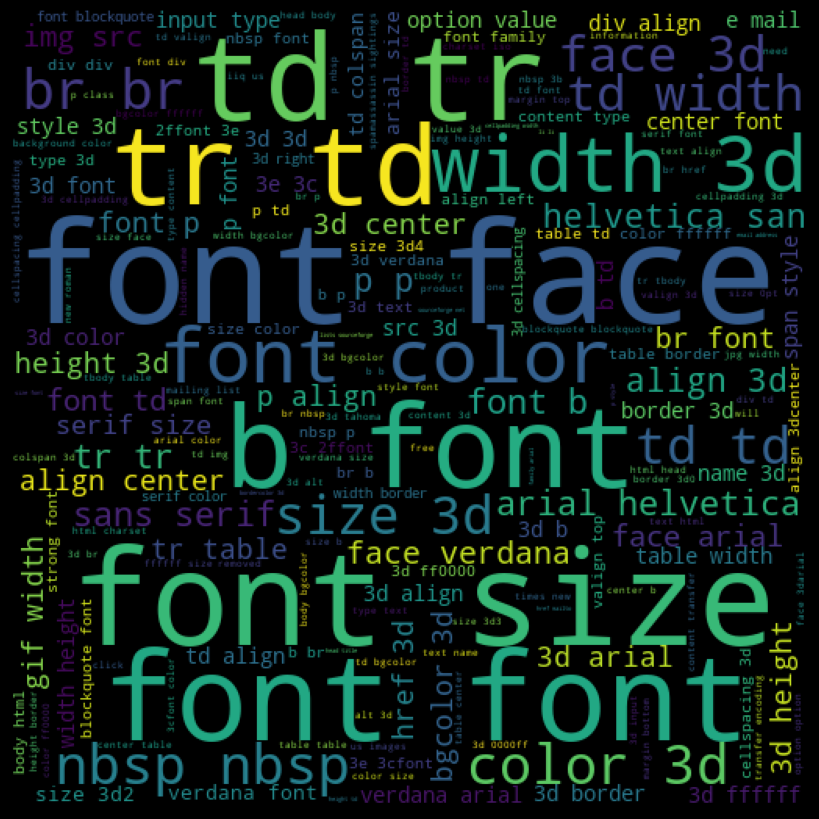

In [813]:
spam_words = " ".join(list(df[df["Type"] == "1"]["Message"]))
spam_wordcloud = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

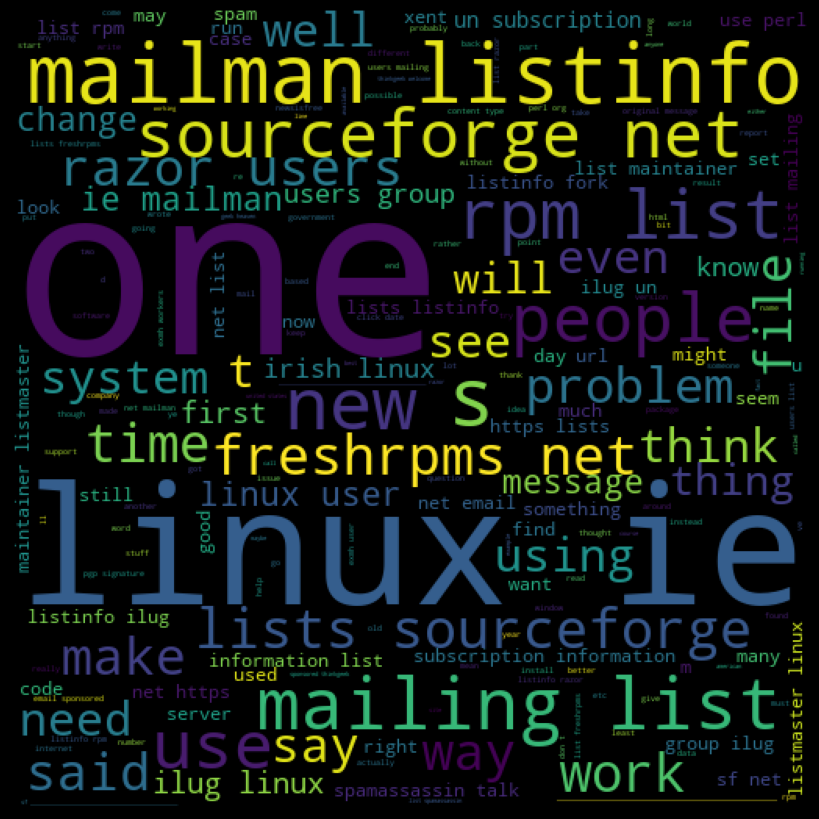

In [814]:
non_spam_words = " ".join(list(df[df["Type"] == "0"]["Message"]))
non_spam_wordcloud = WordCloud(width = 512, height = 512).generate(non_spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(non_spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()